# Tutorial 1: Data access core concepts
### `themachinethatgoesping` tutorial series

`themachinethatgoesping` concepts covered:
- Find and list raw data files to process
- Create a File Handler object ot access the file data
- Access a group of pings with the File Handler
- Access data in a ping

In [1]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as theping
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

### 1. List raw data files with find_files()

In [2]:
# define a folder to search for raw data files
folder = '../unittest_data'

# find all Kongsberg files in the list of folders
files = theping.echosounders.index_functions.find_files(folder, [".all","wcd"])

Found 18 files


In [3]:
# The output of find_files() is a list of file paths, which are strings
print(type(files))
print(type(files[0]))
print(files[0])

<class 'list'>
<class 'str'>
../unittest_data/kongsberg/simon/-4564033532462129271.wcd


In [4]:
# show files found
files.sort()
for i, file in enumerate(files):
    print(f"({i}/{len(files)}) {file}")

(0/18) ../unittest_data/kongsberg/a/c/8136328335172073169.all
(1/18) ../unittest_data/kongsberg/a/c/8136328335172073169.wcd
(2/18) ../unittest_data/kongsberg/a/f/ALL/7940434004712898291.all
(3/18) ../unittest_data/kongsberg/a/f/WCD/7940434004712898291.wcd
(4/18) ../unittest_data/kongsberg/a/y/-6430362035178526648.all
(5/18) ../unittest_data/kongsberg/a/y/-6430362035178526648.wcd
(6/18) ../unittest_data/kongsberg/e/5556426203143536656.all
(7/18) ../unittest_data/kongsberg/e/6340811117880500921.all
(8/18) ../unittest_data/kongsberg/g/-2784638328592650682.all
(9/18) ../unittest_data/kongsberg/g/-2784638328592650682.wcd
(10/18) ../unittest_data/kongsberg/he/-3740211369500593285.all
(11/18) ../unittest_data/kongsberg/he/-3740211369500593285.wcd
(12/18) ../unittest_data/kongsberg/simon/-4564033532462129271.all
(13/18) ../unittest_data/kongsberg/simon/-4564033532462129271.wcd
(14/18) ../unittest_data/kongsberg/turbeams/-7867389334864073581.all
(15/18) ../unittest_data/kongsberg/turbeams/-7867

### 2. Create a File Handler object to access the raw data files

In [5]:
# Create a File Handler to access the raw data files
fileHandler = theping.echosounders.kongsbergall.KongsbergAllFileHandler(files)

indexing files ⠐ 100% :00s<00m:00s] [..6328335172073169.all (1/18)]                               
indexing files ⠠ 100% :00s<00m:00s] [..3858047591065953.wcd (18/18)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 1484 datagrams in 18 files (26MB)]                                          
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


In [6]:
# Notes:
#   - A File Handler extracts basic information from the files but do not load the acoustic data. It only indexes the datagrams and provides access to them as a combined file stream
#   - A file Handler is initalized with the list of files
#   - A File Handler pairs .all and .wcd files

# See class of a File Hander
type(fileHandler)

themachinethatgoesping.echosounders_cppy.kongsbergall.KongsbergAllFileHandler

In [7]:
# Use the print function to get a summary of the dataset that can be accessed with the File Handler
print(fileHandler)

KongsbergAllFileHandler
#######################
-
File infos 
-------------               
- Number of loaded .all files: : 10       
- Number of loaded .wcd files: : 8        
- Total file size: :             26.58 MB 

 Detected datagrams 
^^^^^^^^^^^^^^^^^^^^ 
- timestamp_first:  21/08/2012 17:09:42.36 
- timestamp_last:   26/07/2024 15:02:51.40 
- Total:            1484                   
- Datagrams [0x30]: 4                      [PUIDOutput]
- Datagrams [0x31]: 20                     [PUStatusOutput]
- Datagrams [0x33]: 3                      [ExtraParameters]
- Datagrams [0x41]: 51                     [AttitudeDatagram]
- Datagrams [0x43]: 32                     [ClockDatagram]
- Datagrams [0x47]: 1                      [SurfaceSoundSpeedDatagram]
- Datagrams [0x49]: 18                     [InstallationParametersStart]
- Datagrams [0x4e]: 166                    [RawRangeAndAngle]
- Datagrams [0x4f]: 10                     [QualityFactorDatagram]
- Datagrams [0x50]: 62           

### 3. Access a group of pings with the File Handler

In [8]:
# Access a group of pings from the File Handler with the get_pings() method
pingContainer = fileHandler.get_pings()

# The output is a Ping Container object
type(pingContainer)

themachinethatgoesping.echosounders_cppy.kongsbergall.filedatacontainers.KongsbergAllPingContainer

In [9]:
# Use the print function to get a summary of the contents of a Ping Container
print(pingContainer)

PingContainer
#############
-
Time info 
------------            
- Start time: 21/08/2012 17:09:42.36 
- End time:   21/04/2023 17:48:17.14 
- Sorted:     ascending              

 Contained pings 
----------------- 
- Total:    174 
- TRX-102:  66  
- TRX-2004: 14  
- TRX-2031: 14  
- TRX-2086: 16  
- TRX-210:  10  
- TRX-2106: 16  
- TRX-213:  17  
- TRX-221:  10  
- TRX-233:  11  


### 4. Access an individual ping in the Ping Container


In [10]:
# Access an individual ping in a Ping Container simply by indexing
ping = pingContainer[42]

# The result is a Ping object
type(ping)

themachinethatgoesping.echosounders_cppy.kongsbergall.filetypes.KongsbergAllPing

In [11]:
# Use the print function to get a summary of the contents of a Ping object
print(ping)

KongsbergAllPing
################
-
Ping infos 
-------------                                                                                                                                                                                                                                                                                                                                                                                                               
- Channel id:             TRX-102                                                                                                                                                                                                                                                                                                                                                                                                         
- Time info:              13/02/2014 08:12:42.72                                                                

### 5. Access data in a ping

In [12]:
# A Ping object has 3 types of information: base, bottom, and water-column. Let's just talk here about the base information

# An example of base information is location
pingLocation = ping.get_geolocation()

# see class of a "Ping Location" object
type(pingLocation)

themachinethatgoesping.navigation.datastructures.GeolocationLatLon

In [13]:
# Use the print function to get a summary of the contents of a Ping Location
print(pingLocation)

GeolocationLatLon (struct)
##########################
- latitude:  38°24'4.2"S   [ddd°mm',ss.s''N/S]
- longitude: 142°29'1.7"E  [ddd°mm',ss.s''E/W]
- z:         0.600         [positive downwards, m]
- yaw:       13.629        [90 ° at east]
- pitch:     1.417         [° positive bow up]
- roll:      -3.289        [° positive port up]


In [14]:
# Data in a Ping Location are simple attributes
print(f"Example ping location - Latitude: {pingLocation.latitude}, Longitude: {pingLocation.longitude}")

Example ping location - Latitude: -38.40116296430116, Longitude: 142.48379345259943


### 6. Conclusion
Putting it all together with an example. If you want to extract latitudes and longitudes from all pings in the entire dataset

Found 18 files
indexing files ⠐ 100% :00s<00m:00s] [..4033532462129271.wcd (1/18)]                               
indexing files ⠠ 100% :00s<00m:00s] [..0211369500593285.wcd (18/18)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 1484 datagrams in 18 files (26MB)]                                          
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


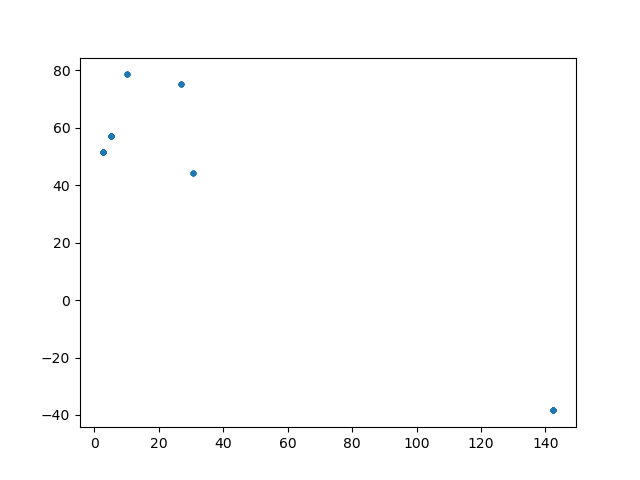

In [15]:
# set folders of data
folder = '../unittest_data'

# list files in folder
files = theping.echosounders.index_functions.find_files(folder, [".all","wcd"]) # find all Kongsberg files in the list of folders

# create a ping container for all pings in the dataset, through a File Handler
fileHandler = theping.echosounders.kongsbergall.KongsbergAllFileHandler(files)
pingContainer = fileHandler.get_pings()

# loop over all pings in the pingContainer and extract latitude and longitude of each ping
lat, lon = [], []
for ping in pingContainer:
    pingLocation = ping.get_geolocation()
    lat.append(pingLocation.latitude) 
    lon.append(pingLocation.longitude)

# plot coordinates of all pings in dataset
plt.figure()
plt.plot(lon, lat, '.')